# CPS DataCleaning

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
#reading in CPS data
cps = pd.read_csv("../data/raw/cps_00050.zip")

In [3]:
#creating CPS copy for manipulation
cps_cleaning = cps.copy()

In [4]:
#seeing data structure
cps_cleaning.shape

(1578977, 161)

In [5]:
#reviewing CPS columns
list(cps_cleaning.columns)

['YEAR',
 'SERIAL',
 'MONTH',
 'HWTFINL',
 'CPSID',
 'REGION',
 'STATEFIP',
 'COUNTY',
 'BPSUPINT',
 'BUNBANKED',
 'BUNDERBANKREAS',
 'BACCT12M',
 'BACCTEV',
 'BACCTFUTREAS',
 'BACCTFUTURE',
 'BAUTOTITLE12M',
 'BCHECKEV',
 'BCHECK12M',
 'BCHECKOFT',
 'BCHECKREAS',
 'BFINPART',
 'BFINSHARE',
 'BMORDEREV',
 'BMORDER12M',
 'BMORDEROFT',
 'BMORDERREAS',
 'BNOACCT',
 'BPAWNEV',
 'BPAWN12M',
 'BPAWNOFT',
 'BPAWNREAS',
 'BPAYDAY',
 'BPAYDAYOFT',
 'BPAYDAYREAS',
 'BREMIT',
 'BREMITREAS',
 'BRENT2OWNEV',
 'BRENT2OWN12M',
 'BRENT2OWNOFT',
 'BTAXLOAN5YR',
 'BTAXLOAN12M',
 'BACCTACCS',
 'BNOACCTREAS',
 'BPPAID12M',
 'BPPAIDBANK',
 'BPPAIDRTL',
 'BPPAIDGOV',
 'BPPAIDEMP',
 'BPPAIDFAM',
 'BPPAIDOTH',
 'BGOVCARDSS',
 'BGOVCARDUN',
 'BGOVCARDFS',
 'BGOVCARDOTH',
 'BCHECK30D',
 'BPAYDAY12M',
 'BPAYDAY30D',
 'BPAWN30D',
 'BMORDER30D',
 'BREMITNOBANK',
 'BREMITANY12M',
 'BREMITBANK12M',
 'BREMIT30D',
 'BTAXLOANEVR',
 'BPPAIDEV',
 'BINCCHECK',
 'BINCACCT',
 'BINCCARD',
 'BINCCASH',
 'BINCOTH',
 'BINCWHERE

In [6]:
#isolating variables of interest
cps_cleaning = cps_cleaning[["YEAR", "MONTH", "REGION", "STATEFIP", "COUNTY", "AGE", "SEX", "RACE", "BUNBANKED", 
                             "BACCTEV", "BCHECKEV", "BCHECK12M", "BCHECKREAS", "BPAYDAY", "BPAYDAYOFT", 
                             "BPAYDAYREAS", "BCHECK30D", "BPAYDAY12M", "BPAYDAY30D", "BINCWHERE", "BBILLCASH", 
                             "BBILLCHECK", "BCREDITAPP", "BCREDITDENY", "BNOACCT", "BSAVECACCT", "BINC12M", "BINTERNET", 
                             "BPSUPINT", "CIHHCOMP", "CINETHH", "CINETHP", "CINTUSE", "CINTOUT", "CINTOTHH", "CINTLIBH", 
                             "CINTSCH", "CINTSCHH", "CINONET", "CIHSNET", "CIPWT", "CISUPPWT", "UBSUPPWT"]]

In [7]:
#examining basic data statistics 
round(cps_cleaning.describe(), 2)

,YEAR,MONTH,REGION,STATEFIP,COUNTY,AGE,SEX,RACE,BUNBANKED,BACCTEV,...,CINTOUT,CINTOTHH,CINTLIBH,CINTSCH,CINTSCHH,CINONET,CIHSNET,CIPWT,CISUPPWT,UBSUPPWT
count,1578977.00,1578977.00,1578977.00,1578977.00,1578977.00,1578977.00,1578977.00,1578977.00,654904.00,654904.00,...,387746.00,521669.00,267729.00,521669.00,267729.00,532780.00,667455.00,654416.00,924073.00,654904.00
mean,2012.61,7.25,28.17,28.08,9700.55,38.54,1.51,157.13,23.79,94.04,...,19.67,38.86,40.38,22.83,40.54,81.83,91.78,1746.18,2348.75,1996.12
std,2.71,2.63,10.66,16.01,15210.79,22.86,0.50,158.09,41.24,21.42,...,37.86,47.59,47.93,40.60,47.79,36.71,25.34,3161.62,1299.32,2104.74
min,2009.00,1.00,11.00,1.00,0.00,0.00,1.00,100.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00
25%,2010.00,6.00,21.00,13.00,0.00,19.00,1.00,100.00,1.00,99.00,...,1.00,1.00,1.00,1.00,1.00,99.00,99.00,0.00,1218.02,0.00
50%,2012.00,7.00,31.00,28.00,0.00,39.00,2.00,100.00,1.00,99.00,...,2.00,2.00,2.00,1.00,2.00,99.00,99.00,0.00,2594.48,1340.44
75%,2015.00,10.00,41.00,42.00,12127.00,57.00,2.00,100.00,2.00,99.00,...,2.00,99.00,99.00,2.00,99.00,99.00,99.00,2798.38,3286.61,3704.23
max,2017.00,11.00,42.00,56.00,55139.00,85.00,2.00,830.00,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,45421.82,16782.11,22492.96


In [8]:
#examining null values as percentages
cps_cleaning.isnull().sum()/len(cps_cleaning)*100

YEAR            0.000000
MONTH           0.000000
REGION          0.000000
STATEFIP        0.000000
COUNTY          0.000000
AGE             0.000000
SEX             0.000000
RACE            0.000000
BUNBANKED      58.523525
BACCTEV        58.523525
BCHECKEV       91.516659
BCHECK12M      67.006866
BCHECKREAS     83.050228
BPAYDAY        74.703558
BPAYDAYOFT     91.516659
BPAYDAYREAS    83.050228
BCHECK30D      83.186899
BPAYDAY12M     58.523525
BPAYDAY30D     83.186899
BINCWHERE      83.819967
BBILLCASH      83.819967
BBILLCHECK     83.819967
BCREDITAPP     83.819967
BCREDITDENY    83.819967
BNOACCT        75.473297
BSAVECACCT     83.819967
BINC12M        83.819967
BINTERNET      83.819967
BPSUPINT       58.523525
CIHHCOMP       91.451300
CINETHH        82.922044
CINETHP        58.554431
CINTUSE        91.470743
CINTOUT        75.443214
CINTOTHH       66.961583
CINTLIBH       83.044148
CINTSCH        66.961583
CINTSCHH       83.044148
CINONET        66.257900
CIHSNET        57.728643


In [9]:
#examining current data types
cps_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1578977 entries, 0 to 1578976
Data columns (total 43 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   YEAR         1578977 non-null  int64  
 1   MONTH        1578977 non-null  int64  
 2   REGION       1578977 non-null  int64  
 3   STATEFIP     1578977 non-null  int64  
 4   COUNTY       1578977 non-null  int64  
 5   AGE          1578977 non-null  int64  
 6   SEX          1578977 non-null  int64  
 7   RACE         1578977 non-null  int64  
 8   BUNBANKED    654904 non-null   float64
 9   BACCTEV      654904 non-null   float64
 10  BCHECKEV     133950 non-null   float64
 11  BCHECK12M    520954 non-null   float64
 12  BCHECKREAS   267633 non-null   float64
 13  BPAYDAY      399425 non-null   float64
 14  BPAYDAYOFT   133950 non-null   float64
 15  BPAYDAYREAS  267633 non-null   float64
 16  BCHECK30D    265475 non-null   float64
 17  BPAYDAY12M   654904 non-null   float64
 18  BP

## Isolating Population of Interest

In [10]:
cps_cleaning_general = cps.copy()

In [11]:
cps_cleaning_general.BUNBANKED.value_counts()

1.0     467622
99.0    128049
2.0      34766
96.0     14159
98.0      8414
97.0      1894
Name: BUNBANKED, dtype: int64

In [13]:
cps_cleaning_general = cps_cleaning_general[cps_cleaning_general.BUNBANKED != 99]

In [14]:
cps_cleaning_general.to_csv("../data/interim/CPS_model_df.csv")

In [13]:
#isolated those who responded to question battery about underbanked status
cps_cleaning_sub = cps_cleaning[cps_cleaning.BPSUPINT==1]

In [14]:
cps_cleaning_sub.BUNBANKED.value_counts()/len(cps_cleaning_sub)*100

1.0    93.134268
2.0     6.865732
Name: BUNBANKED, dtype: float64

Of the subset selected, 93% are unbanked. 

In [15]:
#Missing null data point percentages for sub population
cps_cleaning_sub.isnull().sum()*100/len(cps_cleaning_sub)

YEAR             0.000000
MONTH            0.000000
REGION           0.000000
STATEFIP         0.000000
COUNTY           0.000000
AGE              0.000000
SEX              0.000000
RACE             0.000000
BUNBANKED        0.000000
BACCTEV          0.000000
BCHECKEV        76.725871
BCHECK12M       23.274129
BCHECKREAS      54.399141
BPAYDAY         34.252151
BPAYDAYOFT      76.725871
BPAYDAYREAS     54.399141
BCHECK30D       57.526280
BPAYDAY12M       0.000000
BPAYDAY30D      57.526280
BINCWHERE       65.747849
BBILLCASH       65.747849
BBILLCHECK      65.747849
BCREDITAPP      65.747849
BCREDITDENY     65.747849
BNOACCT         45.600859
BSAVECACCT      65.747849
BINC12M         65.747849
BINTERNET       65.747849
BPSUPINT         0.000000
CIHHCOMP       100.000000
CINETHH        100.000000
CINETHP        100.000000
CINTUSE        100.000000
CINTOUT        100.000000
CINTOTHH       100.000000
CINTLIBH       100.000000
CINTSCH        100.000000
CINTSCHH       100.000000
CINONET     

Creating our sample has created a series of blank columns/variables. These variables will need to be removed. 

In [16]:
#droping all variables missing 100% of data.
cps_cleaning_sub.drop(cps_cleaning_sub.columns[30:], axis=1, inplace = True)

C:\Users\Desmond\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
#examing dimentions of sub population after isolation
cps_cleaning_sub.shape

(497995, 30)

# calculate aggregated counts of general survey population before isolating the underbanked

In [18]:
#isolating underbanked population
cps_underbanked = cps_cleaning_sub[cps_cleaning_sub.BUNBANKED==1]

In [19]:
#Missing null data point percentages for unbanked population
cps_underbanked.isnull().sum()*100/len(cps_underbanked)

YEAR             0.000000
MONTH            0.000000
REGION           0.000000
STATEFIP         0.000000
COUNTY           0.000000
AGE              0.000000
SEX              0.000000
RACE             0.000000
BUNBANKED        0.000000
BACCTEV          0.000000
BCHECKEV        76.767341
BCHECK12M       23.232659
BCHECKREAS      54.575640
BPAYDAY         34.460246
BPAYDAYOFT      76.767341
BPAYDAYREAS     54.575640
BCHECK30D       57.692905
BPAYDAY12M       0.000000
BPAYDAY30D      57.692905
BINCWHERE       65.539754
BBILLCASH       65.539754
BBILLCHECK      65.539754
BCREDITAPP      65.539754
BCREDITDENY     65.539754
BNOACCT         45.424360
BSAVECACCT      65.539754
BINC12M         65.539754
BINTERNET       65.539754
BPSUPINT         0.000000
CIHHCOMP       100.000000
dtype: float64

There are numerous variables missing  sizable if not all data. Will need to refer to documentation to strategies addressing these variables.

In [20]:
#examining the breakdown of why alternative banking is utilized
print("Missing Value Percentages:")
cps_underbanked.BCHECKEV.value_counts()*100/len(cps_underbanked)

Missing Value Percentages:


2.0     20.610430
1.0      1.991358
99.0     0.434882
96.0     0.071151
97.0     0.065761
98.0     0.059077
Name: BCHECKEV, dtype: float64

In [21]:
#confirming the years data was collected for our sample
cps_cleaning_sub.YEAR.value_counts()

2009    115904
2011    111186
2013    100331
2015     87069
2017     83505
Name: YEAR, dtype: int64

2009 must be dropped due to its absense in the ACS dataset

In [22]:
cps_cleaning_sub = cps_cleaning_sub[cps_cleaning_sub["YEAR"] != 2009]

In [23]:
#isolating demographic information
demo_vars = list(cps_cleaning_sub.columns)[:8]

In [24]:
#isolating categorical variables for transformation and analysis. 
cat_vars = list(cps_cleaning_sub.columns)[8:]

In [25]:
#confirmting the data type for categorical variables
cps_cleaning_sub[cat_vars].dtypes

BUNBANKED      float64
BACCTEV        float64
BCHECKEV       float64
BCHECK12M      float64
BCHECKREAS     float64
BPAYDAY        float64
BPAYDAYOFT     float64
BPAYDAYREAS    float64
BCHECK30D      float64
BPAYDAY12M     float64
BPAYDAY30D     float64
BINCWHERE      float64
BBILLCASH      float64
BBILLCHECK     float64
BCREDITAPP     float64
BCREDITDENY    float64
BNOACCT        float64
BSAVECACCT     float64
BINC12M        float64
BINTERNET      float64
BPSUPINT       float64
CIHHCOMP       float64
dtype: object

## Imputing Null Values

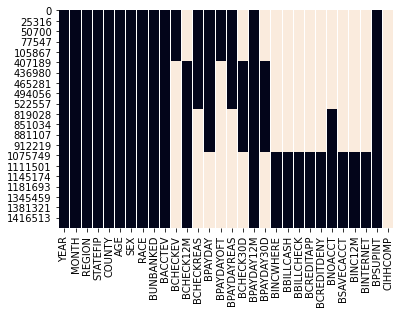

In [26]:
#visualizing data missingness for final dataframe
sns.heatmap(cps_underbanked.isnull(), cbar=False);

In [27]:
columns = list(cps_underbanked.columns[-10:])
columns

['BBILLCASH',
 'BBILLCHECK',
 'BCREDITAPP',
 'BCREDITDENY',
 'BNOACCT',
 'BSAVECACCT',
 'BINC12M',
 'BINTERNET',
 'BPSUPINT',
 'CIHHCOMP']

In [28]:
cps_underbanked[columns+['YEAR']].YEAR.value_counts()

2009    107754
2011    102926
2013     93296
2015     81243
2017     78585
Name: YEAR, dtype: int64

In [29]:
cps_underbanked[cps_underbanked.YEAR == 2009]

,YEAR,MONTH,REGION,STATEFIP,COUNTY,AGE,SEX,RACE,BUNBANKED,BACCTEV,...,BBILLCASH,BBILLCHECK,BCREDITAPP,BCREDITDENY,BNOACCT,BSAVECACCT,BINC12M,BINTERNET,BPSUPINT,CIHHCOMP
0,2009,1,32,1,1015,78,2,200,1.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1,2009,1,32,1,0,71,1,200,1.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,2009,1,32,1,0,68,2,100,1.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,2009,1,32,1,0,67,1,100,1.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,2009,1,32,1,0,62,1,100,1.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133945,2009,1,41,56,0,64,2,100,1.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
133946,2009,1,41,56,0,61,1,100,1.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
133947,2009,1,41,56,0,11,2,100,1.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
133948,2009,1,41,56,0,11,1,100,1.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [30]:
cps_underbanked = cps_underbanked[cps_underbanked.YEAR != 2009]

In [31]:
cps_underbanked.to_csv("../data/processed/CPS_2009_2017_clean.csv")